<a href="https://colab.research.google.com/github/lilmonteiro/fase1-techchalenge/blob/main/Fase1_TechChalenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Custos Médicos de Seguros de Saúde

## Objetivo do Projeto
O objetivo deste projeto é desenvolver um modelo preditivo que possa estimar os custos médicos individuais cobrados por seguros de saúde com base em várias características dos beneficiários, como idade, índice de massa corporal, hábitos de fumar, entre outros. Esta análise ajudará a entender quais fatores contribuem mais para os custos do seguro e permitirá previsões precisas de custos para novos clientes.



## Visão Geral dos Dados
Aqui estão as primeiras linhas do dataset, que nos ajudam a entender a estrutura e os tipos de dados com os quais estamos trabalhando:


##Carregar a base de dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix

np.random.seed(42)

uri = 'https://gist.githubusercontent.com/lilmonteiro/d4848c344b408f46ece72c72960fdb52/raw/dfea7222e5a8696fb7e85624cc9b475fae02a0fa/gistfile1.txt'

dados = pd.read_csv(uri)
dados

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


## Exploração dos dados

Histograma para visualizar assimetria/simetria de dados.

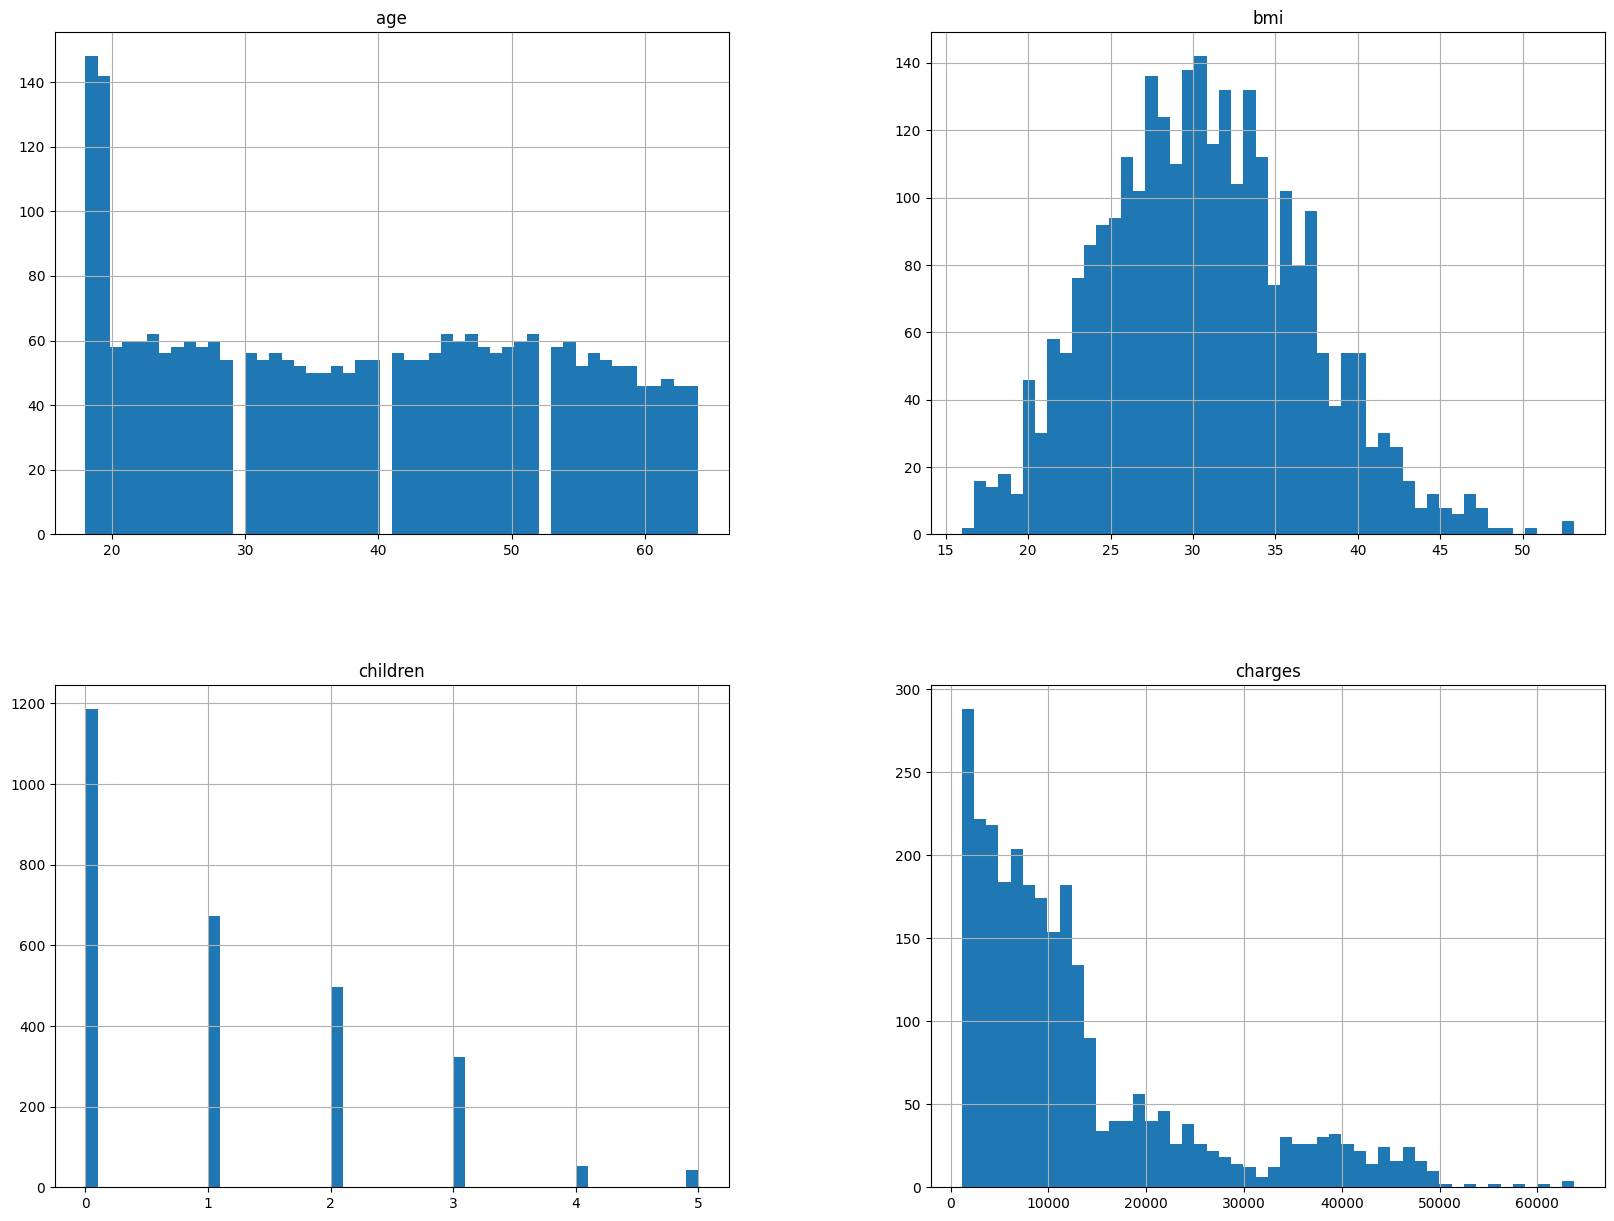

In [2]:
dados.hist(bins=50, figsize=(20,15))
plt.show()

### Gráfico 1: Scatter Matrix

Text(0.5, 0.98, 'Gráfico 1: Scatter Matrix')

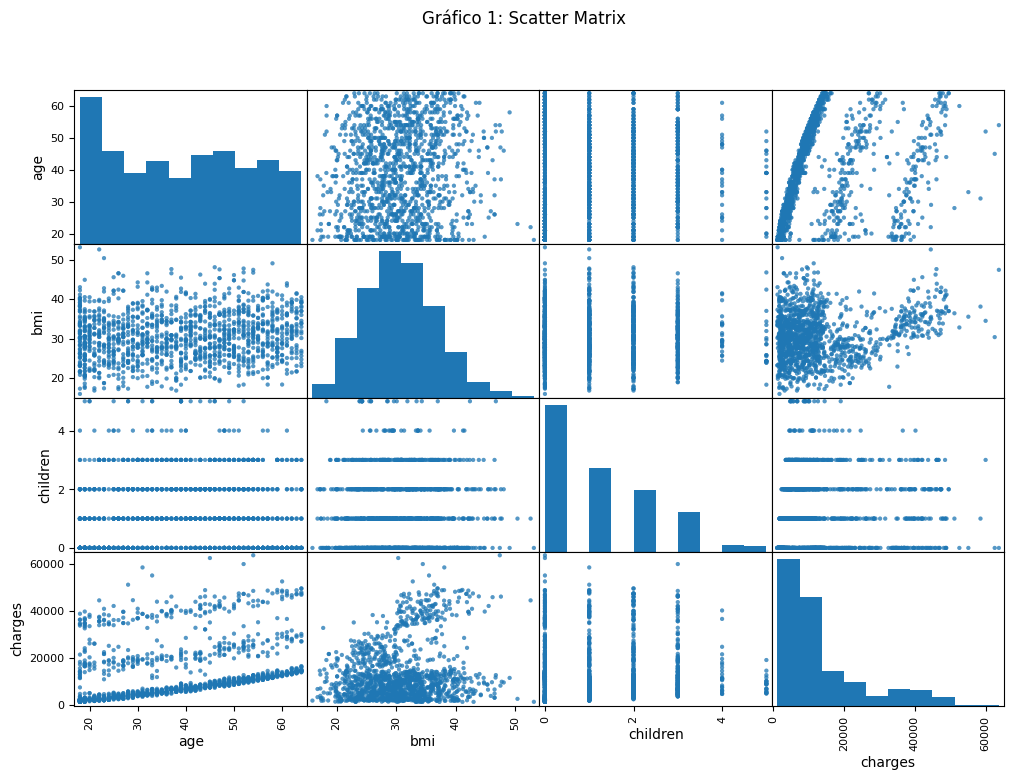

In [3]:
scatter_matrix(dados, figsize=(12,8))
plt.suptitle('Gráfico 1: Scatter Matrix')

###Gráfico 2: IMC x Encargos

<ipython-input-4-59111bcac763>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter( dados['bmi'], dados['charges'], s=5, cmap='rainbow' )


<function matplotlib.pyplot.show(close=None, block=None)>

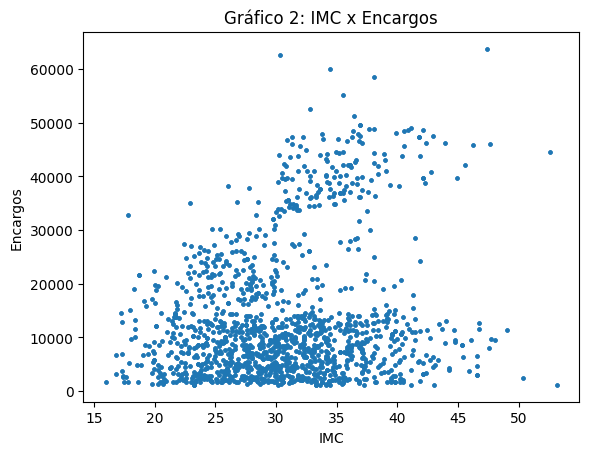

In [4]:
plt.scatter( dados['bmi'], dados['charges'], s=5, cmap='rainbow' )
plt.xlabel("IMC")
plt.ylabel("Encargos")
plt.title('Gráfico 2: IMC x Encargos')
plt.show

Segundo a visualização acima, pessoas com `bmi` (IMC) superior a 30, estão na faixa dos maiores encargos.

###Gráfico 3: Idade x Encargos

<ipython-input-5-9b61d1468fdc>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter( dados['age'], dados['charges'], s=5, cmap='rainbow' )


<function matplotlib.pyplot.show(close=None, block=None)>

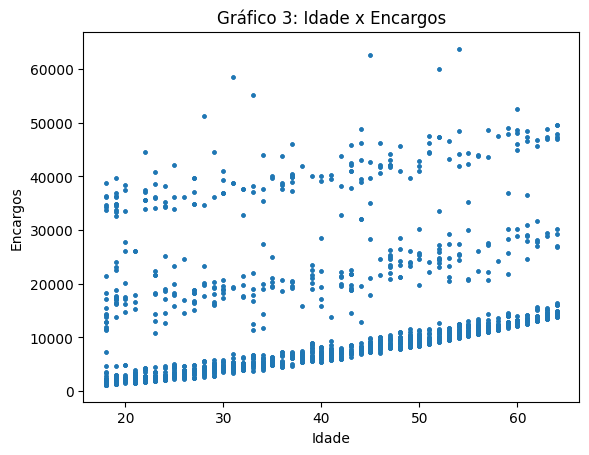

In [5]:
plt.scatter( dados['age'], dados['charges'], s=5, cmap='rainbow' )
plt.xlabel("Idade")
plt.ylabel("Encargos")
plt.title('Gráfico 3: Idade x Encargos')
plt.show

###Gráfico 4: IMC x Custos x Fumantes

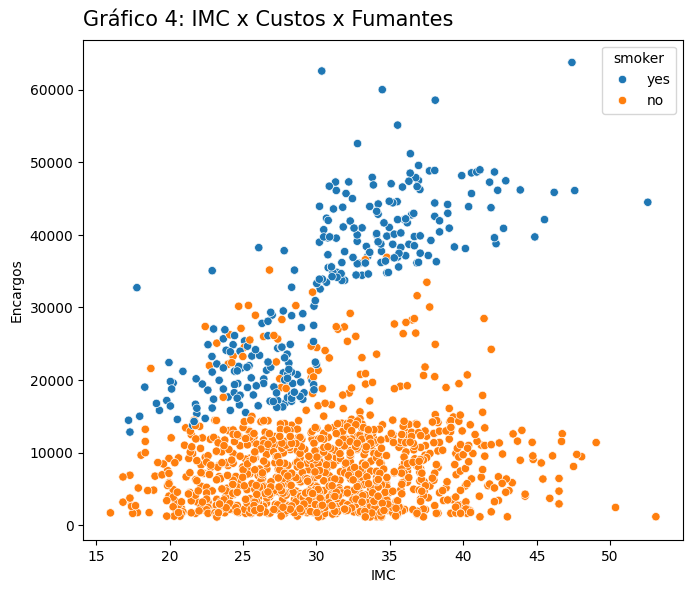

In [6]:
fig = plt.figure(figsize = (6, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.scatterplot(data = dados, x = 'bmi', y = 'charges', hue = 'smoker')
ax.set_title('Gráfico 4: IMC x Custos x Fumantes', loc = 'left', fontsize = 15, pad = 10)
ax.set_ylabel('Encargos', fontsize = 10)
ax.set_xlabel('IMC', fontsize = 10)
plt.show()

Segundo a visualização acima, quando a pessoa é `smoker` (fumante) os encargos sobem significativamente.

## Pré-processamento de Dados
Antes de modelar, precisamos preparar os dados. Isso inclui codificar variáveis categóricas como `sex` e `smoker` e normalizar variáveis numéricas como `age` e `bmi` para garantir que nosso modelo trate todas as variáveis de forma equitativa.


In [7]:
label_encoder = LabelEncoder()
dados['sex'] = label_encoder.fit_transform(dados['sex'])
dados['smoker'] = label_encoder.fit_transform(dados['smoker'])

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    ['region']),
    verbose_feature_names_out=False,
    remainder='passthrough')

dados = one_hot_enc.fit_transform(dados)
dados = pd.DataFrame(dados, columns=one_hot_enc.get_feature_names_out())
dados

,region_northeast,region_northwest,region_southeast,region_southwest,age,sex,bmi,children,smoker,charges
0,0.0,0.0,0.0,1.0,19.0,0.0,27.900,0.0,1.0,16884.92400
1,0.0,0.0,1.0,0.0,18.0,1.0,33.770,1.0,0.0,1725.55230
2,0.0,0.0,1.0,0.0,28.0,1.0,33.000,3.0,0.0,4449.46200
3,0.0,1.0,0.0,0.0,33.0,1.0,22.705,0.0,0.0,21984.47061
4,0.0,1.0,0.0,0.0,32.0,1.0,28.880,0.0,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
2767,0.0,0.0,1.0,0.0,47.0,0.0,45.320,1.0,0.0,8569.86180
2768,0.0,0.0,0.0,1.0,21.0,0.0,34.600,0.0,0.0,2020.17700
2769,0.0,1.0,0.0,0.0,19.0,1.0,26.030,1.0,1.0,16450.89470
2770,0.0,1.0,0.0,0.0,23.0,1.0,18.715,0.0,0.0,21595.38229


In [8]:
dados.head()

,region_northeast,region_northwest,region_southeast,region_southwest,age,sex,bmi,children,smoker,charges
0,0.0,0.0,0.0,1.0,19.0,0.0,27.900,0.0,1.0,16884.92400
1,0.0,0.0,1.0,0.0,18.0,1.0,33.770,1.0,0.0,1725.55230
2,0.0,0.0,1.0,0.0,28.0,1.0,33.000,3.0,0.0,4449.46200
3,0.0,1.0,0.0,0.0,33.0,1.0,22.705,0.0,0.0,21984.47061
4,0.0,1.0,0.0,0.0,32.0,1.0,28.880,0.0,0.0,3866.85520


In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region_northeast  2772 non-null   float64
 1   region_northwest  2772 non-null   float64
 2   region_southeast  2772 non-null   float64
 3   region_southwest  2772 non-null   float64
 4   age               2772 non-null   float64
 5   sex               2772 non-null   float64
 6   bmi               2772 non-null   float64
 7   children          2772 non-null   float64
 8   smoker            2772 non-null   float64
 9   charges           2772 non-null   float64
dtypes: float64(10)
memory usage: 216.7 KB


In [10]:
dados.isnull().sum()

region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
dtype: int64

In [11]:
#removendo linhas duplicadas
dados.duplicated().sum()

1435

In [12]:
#pegando as linhas duplicadas e excluindo do dataset
duplicadas = dados[dados.duplicated(keep=False)]
duplicadas

,region_northeast,region_northwest,region_southeast,region_southwest,age,sex,bmi,children,smoker,charges
0,0.0,0.0,0.0,1.0,19.0,0.0,27.900,0.0,1.0,16884.92400
1,0.0,0.0,1.0,0.0,18.0,1.0,33.770,1.0,0.0,1725.55230
2,0.0,0.0,1.0,0.0,28.0,1.0,33.000,3.0,0.0,4449.46200
3,0.0,1.0,0.0,0.0,33.0,1.0,22.705,0.0,0.0,21984.47061
4,0.0,1.0,0.0,0.0,32.0,1.0,28.880,0.0,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
2767,0.0,0.0,1.0,0.0,47.0,0.0,45.320,1.0,0.0,8569.86180
2768,0.0,0.0,0.0,1.0,21.0,0.0,34.600,0.0,0.0,2020.17700
2769,0.0,1.0,0.0,0.0,19.0,1.0,26.030,1.0,1.0,16450.89470
2770,0.0,1.0,0.0,0.0,23.0,1.0,18.715,0.0,0.0,21595.38229


In [13]:
#removendo linhas duplicadas
dados = dados.drop_duplicates()

Visualizar novamente assimetria/simetria após os tratamentos sobre as informações

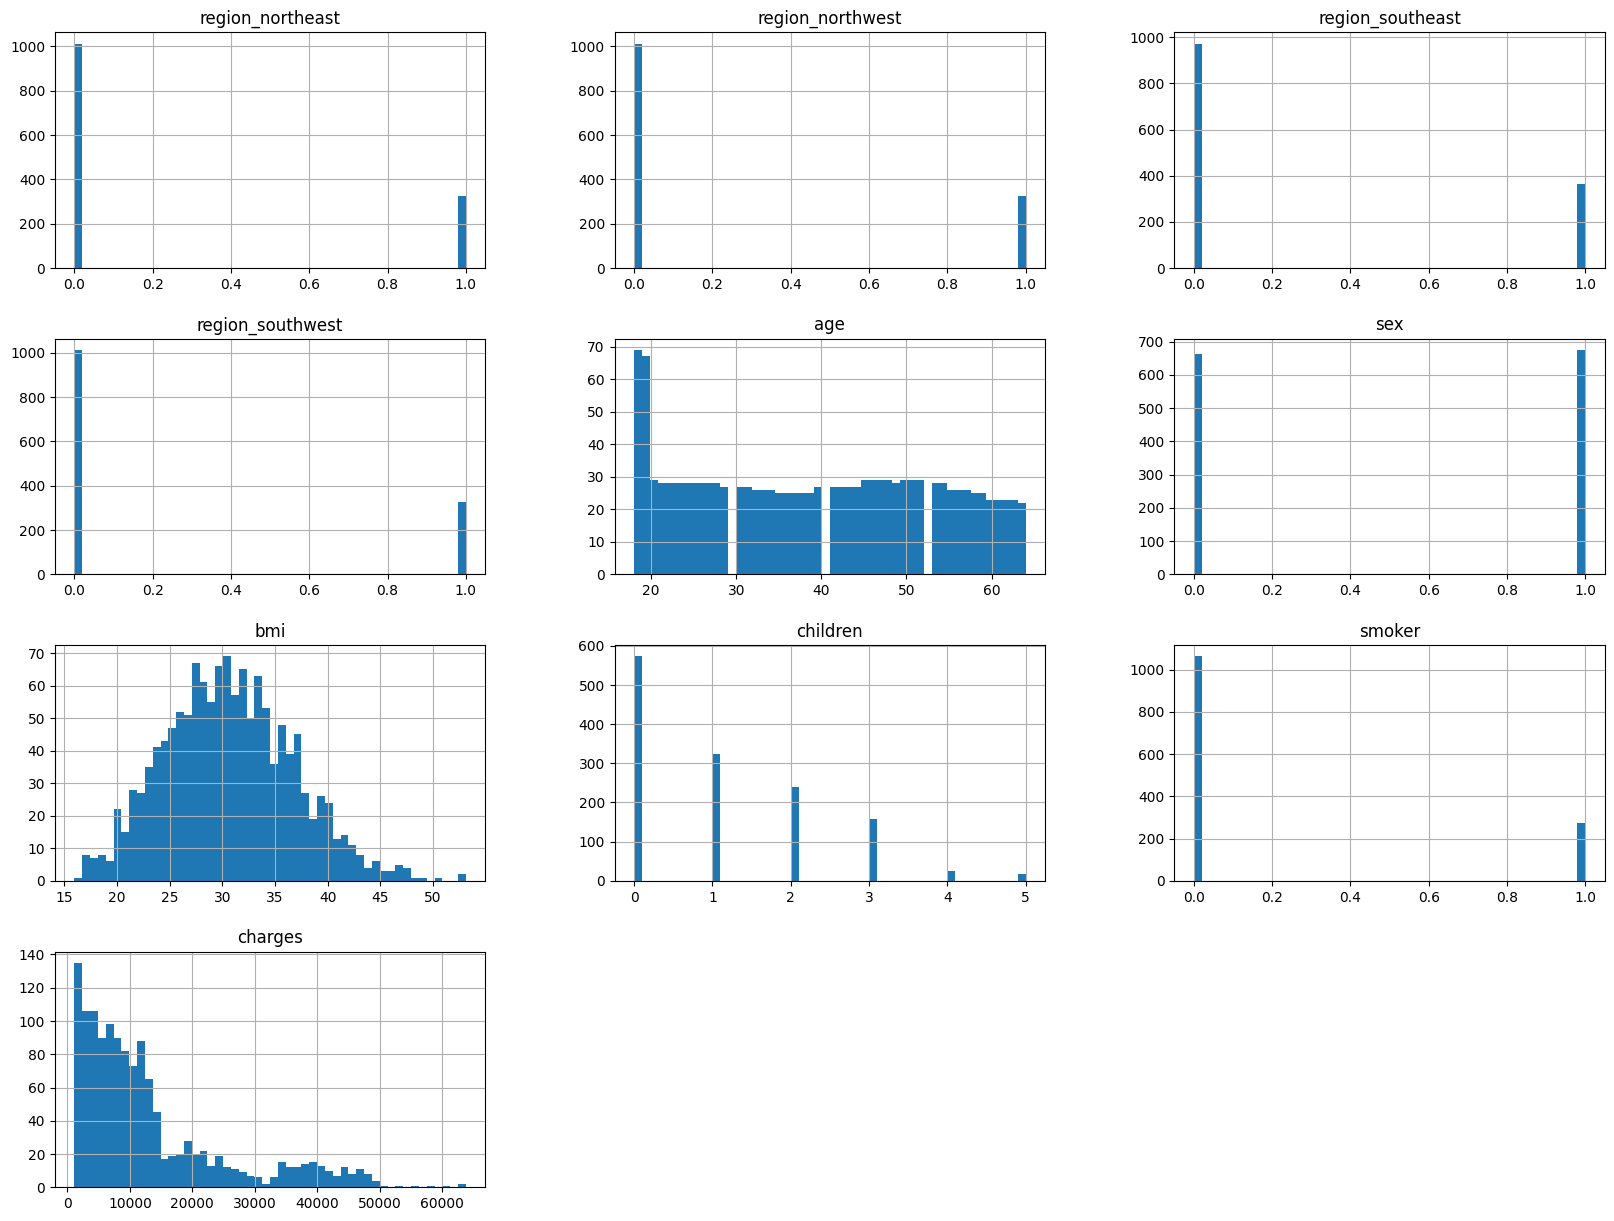

In [14]:
dados.hist(bins=50, figsize=(20,15))
plt.show()

### Escalando os dados

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

dados_ = dados.drop(['charges'], axis=1)
scaler = StandardScaler()
dados_escalados = scaler.fit_transform(dados_)
dados_escalados = pd.DataFrame(data=dados_escalados, columns=dados_.columns)
dados_escalados

,region_northeast,region_northwest,region_southeast,region_southwest,age,sex,bmi,children,smoker
0,-0.565546,-0.565546,-0.611638,1.764609,-1.440418,-1.009771,-0.453160,-0.909234,1.969660
1,-0.565546,-0.565546,1.634955,-0.566698,-1.511647,0.990324,0.509422,-0.079442,-0.507702
2,-0.565546,-0.565546,1.634955,-0.566698,-0.799350,0.990324,0.383155,1.580143,-0.507702
3,-0.565546,1.768203,-0.611638,-0.566698,-0.443201,0.990324,-1.305052,-0.909234,-0.507702
4,-0.565546,1.768203,-0.611638,-0.566698,-0.514431,0.990324,-0.292456,-0.909234,-0.507702
...,...,...,...,...,...,...,...,...,...
1332,-0.565546,1.768203,-0.611638,-0.566698,0.767704,0.990324,0.050269,1.580143,-0.507702
1333,1.768203,-0.565546,-0.611638,-0.566698,-1.511647,-1.009771,0.206053,-0.909234,-0.507702
1334,-0.565546,-0.565546,1.634955,-0.566698,-1.511647,-1.009771,1.014490,-0.909234,-0.507702
1335,-0.565546,-0.565546,-0.611638,1.764609,-1.297958,-1.009771,-0.797524,-0.909234,-0.507702


# Regressão Linear Multipla
Para treinar o primeiro modelo, utilizamos os dados antes de escalados.
E escolhemos as variáveis `sex`, `bmi`, `age` como independentes, pois analisando os **Gráfico 2, 3 e 4**, entendemos que são as variáveis com uma distribuição e relação interessantes para treino, considerando nossa variável dependente: encargos (charges).

In [16]:
import statsmodels.api as sm

df = pd.DataFrame(dados)

df['Intercepto'] = 1

# Variáveis independentes (X)
X = df[['smoker', 'bmi', 'age']]

# Variável dependente(Y)
Y = dados['charges']

modelo = sm.OLS(Y, X).fit()

print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              3029.
Date:                Mon, 13 May 2024   Prob (F-statistic):                        0.00
Time:                        19:32:45   Log-Likelihood:                         -13621.
No. Observations:                1337   AIC:                                  2.725e+04
Df Residuals:                    1334   BIC:                                  2.726e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

def validar_modelo(y_test, pred, title):

  r2 = r2_score(y_test, pred)
  mape = mean_absolute_percentage_error(y_test, pred)
  mae = mean_absolute_error(y_test, pred)
  mse = mean_squared_error(y_test, pred)
  rmse = np.sqrt(mse)

  print(f'-----------{title}-----------')
  print(f'MAPE: Previsões que erram por  { "%.3f" % (mape * 100)} % do valor real')
  print(f'MAE: { "%.3f" % mae }')
  print(f'MSE: { "%.3f" % mse}')
  print(f'RMSE: { "%.3f" % rmse}')
  print(f'R²: { "%.3f" % (r2 * 100)}%')

y_pred = modelo.predict(X)
validar_modelo(Y, y_pred, 'Regressão Linear Multipla')

-----------Regressão Linear Multipla-----------
MAPE: Previsões que erram por  52.274 % do valor real
MAE: 4442.656
MSE: 41331501.601
RMSE: 6428.958
R²: 71.797%


# Decision Tree

In [18]:
from sklearn.model_selection import train_test_split

X_escalado = dados_escalados
y = dados['charges']

X_train, X_test, y_train, y_test= train_test_split(X_escalado, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.tree import DecisionTreeRegressor
arvore_de_decisao = DecisionTreeRegressor(max_depth=3)

arvore_de_decisao.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [20]:
arvore_previsoes = arvore_de_decisao.predict(X_test)

In [21]:
validar_modelo(y_test, arvore_previsoes, 'DecisionTree')

-----------DecisionTree-----------
MAPE: Previsões que erram por  38.093 % do valor real
MAE: 2755.270
MSE: 19670972.640
RMSE: 4435.197
R²: 89.295%


In [22]:
mae_errors=[]

for i in range(1, 10):
  arvore_de_decisao = DecisionTreeRegressor(max_depth=i)
  arvore_de_decisao.fit(X_train, y_train)
  arvore_previsoes = arvore_de_decisao.predict(X_test)
  mae = mean_absolute_error(y_test, arvore_previsoes)
  mae_errors.append(mae)

mae_errors

[5830.6356726523,
 3312.8448982743953,
 2755.2695091716937,
 2613.6743128019702,
 2598.242470385551,
 2793.0541290307956,
 2800.5107623179133,
 2832.664124202801,
 2848.1469442819734]

###Gráfico 5: Mean Absolute Error por Depth

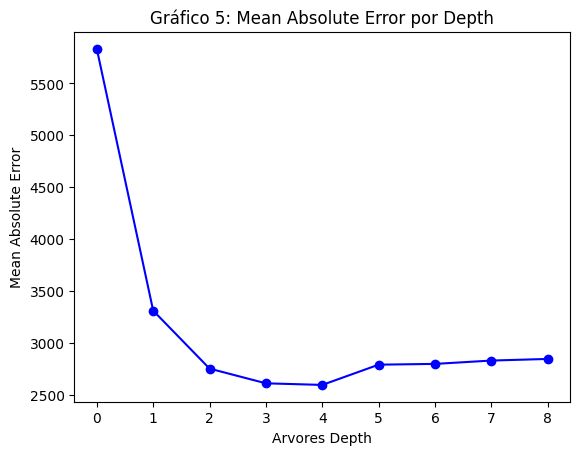

In [23]:
plt.plot(mae_errors, 'bo-')
plt.xlabel('Arvores Depth')
plt.ylabel('Mean Absolute Error')
plt.title('Gráfico 5: Mean Absolute Error por Depth')
plt.show()

# KNRegressor

In [24]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)

knr_pred = knr.predict(X_test)

In [25]:
validar_modelo(y_test, knr_pred, 'KNeighborsRegressor')

-----------KNeighborsRegressor-----------
MAPE: Previsões que erram por  35.958 % do valor real
MAE: 3172.989
MSE: 31194231.752
RMSE: 5585.180
R²: 83.024%


###Gráfico 6: Mean Absolute Error por Neighbors

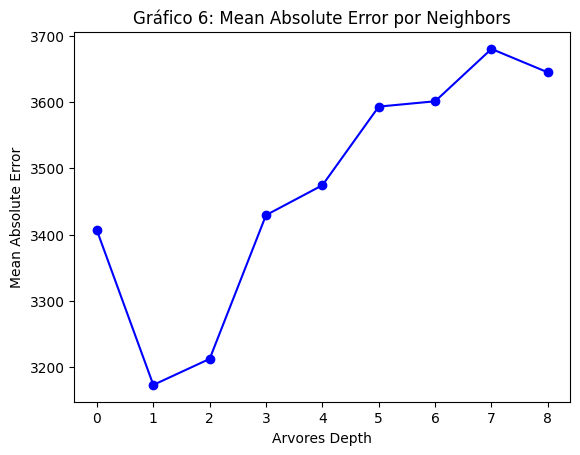

In [26]:
knr_errors=[]

for i in range(1, 10):
  knr = KNeighborsRegressor(n_neighbors=i)
  knr.fit(X_train, y_train)
  knr_pred = knr.predict(X_test)
  error = mean_absolute_error(y_test, knr_pred)
  knr_errors.append(error)

plt.plot(knr_errors, 'bo-')
plt.xlabel('Arvores Depth')
plt.ylabel('Mean Absolute Error')
plt.title('Gráfico 6: Mean Absolute Error por Neighbors')
plt.show()

#RandomForest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(max_depth=5)
rf_reg.fit(X_train, y_train)

rf_reg_pred = rf_reg.predict(X_test)


In [28]:
validar_modelo(y_test, rf_reg_pred, 'RandomForestRegressor')

-----------RandomForestRegressor-----------
MAPE: Previsões que erram por  29.631 % do valor real
MAE: 2438.284
MSE: 18174698.070
RMSE: 4263.179
R²: 90.109%


# Avaliando Resultados


In [29]:
def gerar_grafico_resultado(y_train, x_train, m, title):
  fig = plt.figure(figsize = (5, 5))
  ax = fig.add_axes([0, 0, 1, 1])

  y_train_pred = m.predict(x_train)
  sns.regplot(x = y_train, y = y_train_pred, line_kws=dict(color="g"), scatter_kws={'s':20})
  ax.set_title(f'{title}": Y Real x Y Previsto', loc = 'left', fontsize = 15, pad = 5)
  ax.set_xlabel('Encargos (Real)')
  ax.set_ylabel('Encargos (Previsto)')
  plt.show()

###Gráfico 7: DecisionTree: Y Real x Y Previsto

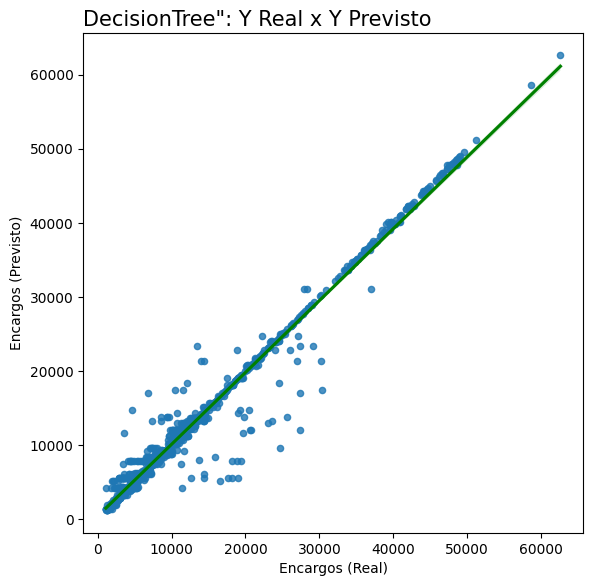

In [30]:
gerar_grafico_resultado(y_train, X_train, arvore_de_decisao, 'DecisionTree')

###Gráfico 8: Regressão Linear Multipla Y Real x Y Previsto

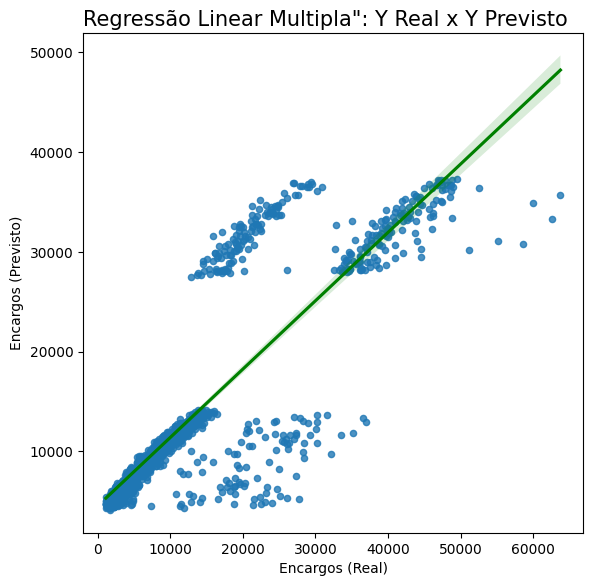

In [31]:
gerar_grafico_resultado(Y, X, modelo, 'Regressão Linear Multipla')

###Gráfico 9: KNeighborRegressor Y Real x Y Previsto

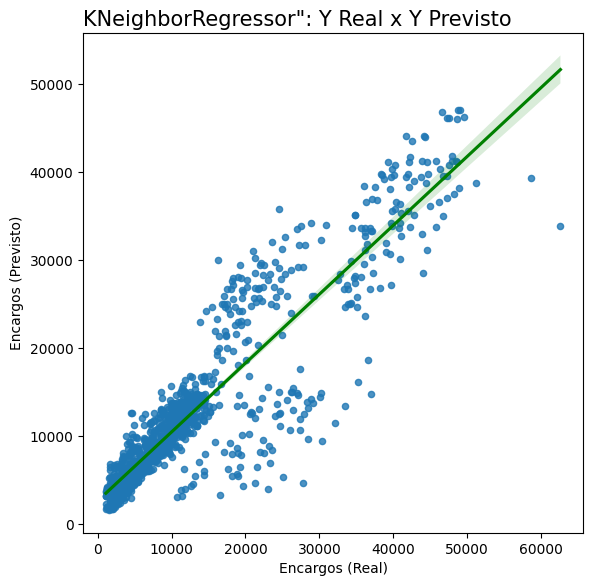

In [32]:
gerar_grafico_resultado(y_train, X_train, knr, 'KNeighborRegressor')

###Gráfico 10: RandomForest Y Real x Y Previsto

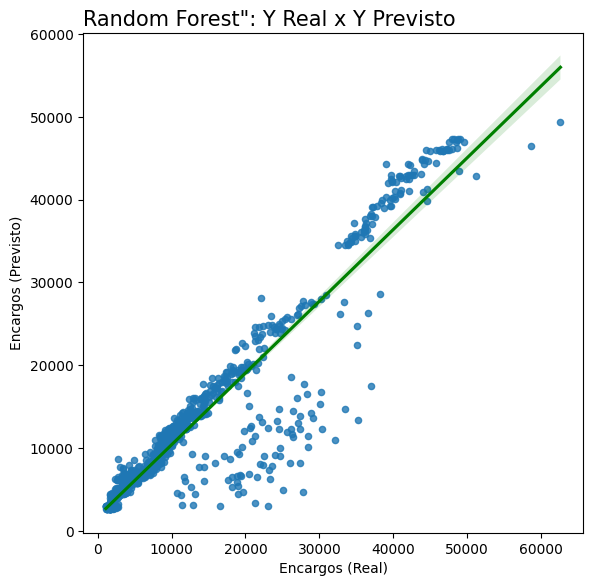

In [33]:
gerar_grafico_resultado(y_train, X_train, rf_reg, 'Random Forest')

# Conclusões

Baseado nos resultados obtidos, o modelo de regressão linear múltipla explicou aproximadamente 84% da variabilidade dos custos médicos (R² = 0.8376). Apesar do sucesso geral, a análise revelou erros significativos, principalmente para valores mais altos de custos médicos, indicando a necessidade de r efinamento do modelo.

Por esse motivo decidimos treinar outros modelos de regressão, para escolher um que tivesse maior fit com nosso modelo e problema de negócio. Treinamos: Decision Tree, Random Forest e KNeighbors Regressor, além do modelo inicial.

Depois de testar e avaliar os resultados, chegamos a conclusão de que o modelo Random Forest se adequou melhor ao nosso objetivo, que era prever com maior assertividade os encargos de plano de saúde.

Estes insights são essenciais para ajustar políticas de seguro de saúde, personalizar ofertas e melhorar o gerenciamento de risco, possibilitando prêmios mais justos e eficazes.

Abaixo criamos um teste para prever os encargos de um futuro possível cliente.
Obrigada.

#Teste você mesmo

In [ ]:
print("Dê enter para salvar")
region_northeast = input('region_northeast: ')
region_northwest = input('region_northwest: ')
region_southeast = input('region_southeast: ')
region_southwest = input('region_southwest: ')
age = input('age: ')
sex = input('sex (f:0 / m:1): ')
bmi = input('bmi (0-100): ')
children = input('children: ')
smoker = input('smoker (y:1 / n:0): ')

Dê enter para salvar


In [ ]:
import locale

def prever_encargo(dado):

  colunas = [
              "region_northeast",
              "region_northwest",
              "region_southeast",
              "region_southwest",
              "age",
              "sex",
              "bmi",
              "children",
              "smoker",
            ]

  data = np.array(dado)

  user_df = pd.DataFrame(data, columns=colunas)
  user_df_escalados = scaler.transform(data)
  user_df_escalados = pd.DataFrame(data=user_df_escalados, columns=user_df.columns)
  locale.setlocale(locale.LC_ALL, '')

  pred = locale.currency(knr.predict(user_df_escalados)[0], grouping=True)
  print('------- PREVISÃO -------')
  print(f'Esse cliente pagará aproximadamente de {pred} em encargos de plano de saúde')
  print(' ')
  print(' ')
  print(' ')
  print(' ')


prever_encargo([[
              region_northeast,
              region_northwest,
              region_southeast,
              region_southwest,
              age,
              sex,
              bmi,
              children,
              smoker,
            ]])
# prever_encargo([[0,1,0,0,70,1,35,0,1]])